In [1]:
# Python_version 2.7.15

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
%matplotlib inline

from scipy.signal import savgol_filter
import octopus as oct

In [2]:
# Import Data
time = np.load('time.npy')
Ftrace_all_Ctrl = np.load('VT50384_GC6m_TNT_Ctrl_axons_Ftrace_all.npy')
Ftrace_all_LPi43TNT = np.load('VT50384_GC6m_LPi4-3_TNT_axons_Ftrace_all.npy')

Ftrace_avg_Ctrl = np.mean(Ftrace_all_Ctrl[:,:,:], axis=2)
Ftrace_avg_LPi43TNT = np.mean(Ftrace_all_LPi43TNT[:,:,:], axis=2)

Ftrace_mean_Ctrl = np.mean(Ftrace_all_Ctrl[63:180,:,:], axis=0)
Ftrace_mean_LPi43TNT  = np.mean(Ftrace_all_LPi43TNT [63:180,:,:], axis=0)

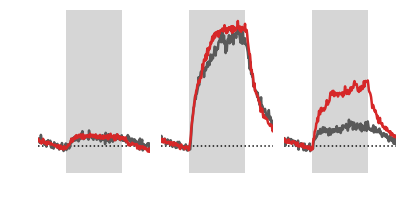

In [3]:
fig = plt.figure(figsize = (6.4,3))

plt.subplots_adjust(wspace = 0.1)

ax = fig.add_subplot(132)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time, Ftrace_avg_Ctrl[:,0], color = '0.35', linewidth = 2.5)
plt.plot(time, Ftrace_avg_LPi43TNT[:,0], color = 'C3', linewidth = 2.5)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
plt.xlim([-4,12])
plt.ylim([-0.5,2.6])
plt.axis('off') 

ax = fig.add_subplot(131)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time, Ftrace_avg_Ctrl[:,1], color = '0.35', linewidth = 2.5)
plt.plot(time, Ftrace_avg_LPi43TNT[:,1], color = 'C3', linewidth = 2.5)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
plt.xlim([-4,12])
plt.ylim([-0.5,2.6])
plt.axis('off')

ax = fig.add_subplot(133)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time, Ftrace_avg_Ctrl[:,2], color = '0.35', linewidth = 2.5)
plt.plot(time, Ftrace_avg_LPi43TNT[:,2], color = 'C3', linewidth = 2.5)
plt.axvspan(0, 8, facecolor='0.2', alpha=0.2)
plt.xlim([-4,12])
plt.ylim([-0.5,2.6])

plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('Fig6_VT50384_TM_GC6m_LPiblock_traces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

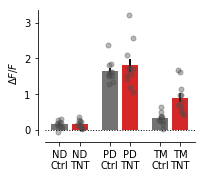

In [4]:
# Make Scatter Plot of LDir

pos = [0,1,2.5,3.5,5,6]

fig = plt.figure(figsize = (0.5*len(pos)-0.3, 2.3))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [Ftrace_mean_Ctrl[1,:], Ftrace_mean_LPi43TNT[1,:], Ftrace_mean_Ctrl[0,:],
        Ftrace_mean_LPi43TNT[0,:], Ftrace_mean_Ctrl[2,:], Ftrace_mean_LPi43TNT[2,:]]
colors = ['0.45', 'C3', '0.45', 'C3', '0.45', 'C3']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), yerr=[stats.sem(data[j])], color=colors[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('ND\nCtrl','ND\nTNT', 'PD\nCtrl','PD\nTNT','TM\nCtrl','TM\nTNT'), size=10)
ax.set_ylabel('$\Delta F/F$', size=10)
yticks = np.array([0, 1, 2, 3])
ax.set_yticklabels([0, 1, 2, 3], size=10)
ax.set_yticks(yticks)
plt.ylim([-0.15,3.35])

bbox_inches = 'tight'
#plt.savefig('Fig6_VT50384_TM_GC6m_LPiblock_boxplot.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [5]:
print(stats.shapiro(Ftrace_mean_Ctrl[0,:]))
print(stats.shapiro(Ftrace_mean_LPi43TNT[0,:]))
print(stats.levene(Ftrace_mean_Ctrl[0,:], Ftrace_mean_LPi43TNT[0,:]))
print(stats.ttest_ind(Ftrace_mean_Ctrl[0,:], Ftrace_mean_LPi43TNT[0,:], equal_var=False))

print(stats.shapiro(Ftrace_mean_Ctrl[1,:]))
print(stats.shapiro(Ftrace_mean_LPi43TNT[1,:]))
print(stats.levene(Ftrace_mean_Ctrl[1,:], Ftrace_mean_LPi43TNT[1,:]))
print(stats.ttest_ind(Ftrace_mean_Ctrl[1,:], Ftrace_mean_LPi43TNT[1,:], equal_var=False))

print(stats.shapiro(Ftrace_mean_Ctrl[2,:]))
print(stats.shapiro(Ftrace_mean_LPi43TNT[2,:]))
print(stats.levene(Ftrace_mean_Ctrl[2,:], Ftrace_mean_LPi43TNT[2,:]))
print(stats.ttest_ind(Ftrace_mean_Ctrl[2,:], Ftrace_mean_LPi43TNT[2,:], equal_var=False))

(0.8638408780097961, 0.06456869095563889)
(0.8806401491165161, 0.10601130872964859)
LeveneResult(statistic=1.9481849807000233, pvalue=0.17808633053449266)
Ttest_indResult(statistic=-0.785928447392456, pvalue=0.44474163399881006)
(0.9768427610397339, 0.9460693597793579)
(0.9258676171302795, 0.37057429552078247)
LeveneResult(statistic=0.17012073973363223, pvalue=0.684392236844078)
Ttest_indResult(statistic=-0.22000177846411317, pvalue=0.8281065737801736)
(0.9786949753761292, 0.9584697484970093)
(0.8879269957542419, 0.13100402057170868)
LeveneResult(statistic=4.905274236916744, pvalue=0.038547988236882394)
Ttest_indResult(statistic=-4.168924082311898, pvalue=0.0011206443861740845)


In [6]:
# Calculate Motion Opponent Suppression Index
MOSI_Ctrl = (Ftrace_mean_Ctrl[0,:] - Ftrace_mean_Ctrl[2,:]) / (Ftrace_mean_Ctrl[0,:])
MOSI_LPi43TNT = (Ftrace_mean_LPi43TNT[0,:] - Ftrace_mean_LPi43TNT[2,:])/ (Ftrace_mean_LPi43TNT[0,:])

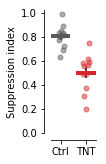

In [7]:
# Make Scatter Plot of MOSI

pos = [0,1]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [MOSI_Ctrl, MOSI_LPi43TNT]
colors = ['0.35', 'C3']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl','TNT'), size=10)
ax.set_ylabel('Suppression index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([0,1.02])

bbox_inches = 'tight'
#plt.savefig('Fig5_50384-GC6m_LPi4-3-TNT_Transparent_Motion_MOSI.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [8]:
print(stats.shapiro(MOSI_Ctrl))
print(stats.shapiro(MOSI_LPi43TNT))
print(stats.levene(MOSI_Ctrl, MOSI_LPi43TNT))
print(stats.ttest_ind(MOSI_Ctrl, MOSI_LPi43TNT, equal_var=True))

(0.9769107699394226, 0.9465544819831848)
(0.9434102773666382, 0.5613805055618286)
LeveneResult(statistic=1.085885950245256, pvalue=0.30981798545505246)
Ttest_indResult(statistic=5.43951591550235, pvalue=2.524132919193912e-05)
